# 本程序绘制计算的吸收谱、傅里叶变换和小波变换图， 服务对象是“_untar”文件夹

### 将本程序安放在“种子文件_single_xyz_WT”（名称可更改）所在文件夹（一级目录）下的任意一个文件夹下（二级目录）。
### 这里读取的文件夹为“种子文件_single_xyz_WT_untar”，并不是挑选出来的“种子文件_single_xyz_WT_pick”文件夹
### 绘制出来的图都在“种子文件_single_xyz_WT_plot”中

last update: 2021.9.12

contacts: zhaohf@ihep.ac.cn

# 配置环境

## 导入各种模块

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

输出导入模板的版本。

In [2]:
print('python version:',sys.version)
print('numpy version:',np.__version__)
print('panda version:',pd.__version__)
print('matplotlib version:',mpl.__version__)

python version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.19.5
panda version: 1.2.4
matplotlib version: 3.3.4


# 设置输入文件夹和输出文件夹

## 设置源文件夹，即经过计算集群计算的文件夹

In [3]:
# 设置源文件夹，即经过计算集群计算的文件夹
dir_src = 'AuPd-4000_au150-0_DW_R0_cncr_WT_untar'

## 设置目标文件夹

In [4]:
# 构建提取文件夹和目录
dir_work = dir_src + '_plot'

## 设置绘图格式和保存图片的模块

In [5]:
# To plot pretty figures
# %matplotlib具体作用是调用matplotlib.pyplot的绘图函数plot()进行绘图时，
# 或生成一个figure画布时，可以直接在你的python console里面生成图像。
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)   # matplotlib.rc 什么意思没找到
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(IMAGES_PATH, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
#    plt.show()

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### 二维绘图

In [6]:
# 绘制x、y曲线，path和file分别是保存图片的路径和文件名
def plot_2d(x, y, path, file, title = 'Au-L3 EXAFS',
                              xlabel = 'E(eV)',
                              ylabel = '$\mu$(a.u.)',
                              location = 'upper right'):
#    import matplotlib.pyplot as plt

    #fig = plt.figure(num=1, figsize=(15, 8),dpi=80) #开启一个窗口，同时设置大小，分辨率
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(x,y, label=file)
    
    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
#ax1.set_xlim(-5,5) 
#ax1.set_ylim(-10,10)    
    ax1.legend(loc=location)
    save_fig(path,file)
#    os.makedirs(path, exist_ok=True)
#    path = os.path.join(path, file + ".png")
#    fig.savefig(path, format='png', dpi=300)
    plt.close(fig)

### 小波变换绘图——3D

In [7]:
# 绘制（k,r,wt）,path和file是保存的路径和图
def plot_3D(k,r,wt,path,file):
#    from mpl_toolkits import mplot3d
#    %matplotlib inline
#    import matplotlib.pyplot as plt
#    import numpy as np
#
    fig = plt.figure()
#    ax = plt.axes(projection='3d')
    ax=fig.add_subplot(1,1,1,projection='3d')
    ax.contour3D(k, r, wt, 50, cmap='binary')
#    ax.contour3D(k, r, wt, 50)
    ax.set_xlabel('$k(\AA^{-1})$')
    ax.set_ylabel('r($\AA$)')
    ax.set_zlabel('wt')
#调整观察角度和方位角。这里将俯仰角设为60度，把方位角调整为35度
#    ax.view_init(60, 35)
    ax.view_init(60, 205)
#  保存图片
    save_fig(path,file)
    plt.close(fig)

In [8]:
# 绘制（k,r,wt）,path和file是保存的路径和图
#def plot_3D(k,r,wt,path,file):

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    
    fig = plt.figure()
#    ax = fig.gca(projection='3d')
    ax=fig.add_subplot(1,1,1,projection='3d')
# Plot the surface.
    surf = ax.plot_surface(k, r, wt, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    ax.set_xlabel('$k(\AA^{-1})$')
    ax.set_ylabel('r($\AA$)')
    ax.set_zlabel('wt')
# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#
#调整观察角度和方位角。这里将俯仰角设为60度，把方位角调整为35度
#    ax.view_init(60, 35)
#    ax.view_init(60, 205)
#
# Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
#  保存图片
    save_fig(path,file)
    plt.close(fig)

IndentationError: unexpected indent (<ipython-input-8-53b97ce9a038>, line 4)

### 小波变换绘图——投影

In [9]:
#
def plot_prj(k,r,wt,path,file):
    from matplotlib import pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

#定义坐标轴
    fig4 = plt.figure()
#    ax4 = plt.axes(projection='3d')
    ax4 = fig4.add_subplot(1,1,1,projection='3d')

#生成三维数据

#作图
    ax4.plot_surface(k,r,wt,alpha=0.0,cmap='winter')     #生成表面， alpha 用于控制透明度
    ax4.contour(k,r,wt_mag,zdir='z', offset=-3,cmap="rainbow")  #生成z方向投影，投到x-y平面
#ax4.contour(k,r,wt_mag,zdir='x', offset=-6,cmap="rainbow")  #生成x方向投影，投到y-z平面
#ax4.contour(k,r,wt_mag,,zdir='y', offset=6,cmap="rainbow")   #生成y方向投影，投到x-z平面
#ax4.contourf(X,Y,Z,zdir='y', offset=6,cmap="rainbow")   #生成y方向投影填充，投到x-z平面，contourf()函数

#设定显示范围
    ax4.set_xlabel('$k(\AA^{-1})$')
#ax4.set_xlim(3, 20)  #拉开坐标轴范围显示投影
    ax4.set_ylabel('r($\AA$)')
#ax4.set_ylim(0,10)
    ax4.set_zlabel('wt')
#ax4.set_zlim(-3, 3)
#
#调整观察角度和方位角。这里将俯仰角设为60度，把方位角调整为35度
#ax.view_init(60, 35)
#ax.view_init(10, 10)
    save_fig(path,file)
    plt.close(fig4)

### 小波变换图——等高线

In [10]:
# 绘制（k,r,wt）,path和file是保存的路径和图
def plot_cntf(k,r,wt,path,file):
#    from mpl_toolkits import mplot3d
#    %matplotlib inline
#    import matplotlib.pyplot as plt
#    import numpy as np
#
    fig = plt.figure()
#    ax = plt.axes(projection='3d')
    ax=fig.add_subplot(1,1,1)
#    ax.contourf(k, r, wt, 50, cmap='binary')
    ax.contourf(k, r, wt, 50)
    ax.set_xlabel('$k(\AA^{-1})$')
    ax.set_ylabel('r($\AA$)')
#  保存图片
    save_fig(path,file)
    plt.close(fig)

### 将mu、chi、wt等绘制在一个图上

In [11]:
def plot_mu_chi_wt(e,mu,k,chi,k_wt,r_wt,wt,path,file):
#    from mpl_toolkits import mplot3d
#    %matplotlib inline
#    import matplotlib.pyplot as plt
#    import numpy as np
#
    fig = plt.figure()
#    fig, ax1,ax2,ax3,ax4 = plt.subplots(nrows=2, ncols=2)
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3,projection='3d')
    ax4 = fig.add_subplot(2,2,4)
#
# omega, mu
    ax1.plot(e, mu, label='$\mu$')
#    ax1.set_title(title)
    ax1.set_xlabel('E(eV)')
    ax1.set_ylabel('$\mu$(a.u.)')
#ax1.set_xlim(-5,5) 
#ax1.set_ylim(-10,10)    
    ax1.legend(loc='upper right')
#
#  k,chi*k^2
    ax2.plot(k, chi, label='$k^2\chi$')
#    ax1.set_title(title)
    ax2.set_xlabel('$k(\AA^{-1})$')
    ax2.set_ylabel('$k^2\chi$(a.u.)')
    ax2.legend(loc='upper right')
#
#   k_wt, r, wt_mag, 3D

#    ax3.contour3D(k, r, wt, 50, cmap='binary')
    ax3.contour3D(k_wt, r, wt, 50)
    ax3.set_xlabel('$k(\AA^{-1})$')
    ax3.set_ylabel('r($\AA$)')
    ax3.set_zlabel('wt')
#调整观察角度和方位角。这里将俯仰角设为60度，把方位角调整为35度
    ax3.view_init(60, 205)
#
#  k_wt,r,wt_mag
#    ax4.contourf(k, r, wt, 50, cmap='binary')
    ax4.contourf(k_wt, r, wt, 50)
    ax4.set_xlabel('$k(\AA^{-1})$')
    ax4.set_ylabel('r($\AA$)')
#
    plt.title('Au-L3 EXAFS')
    save_fig(path,file)
    plt.close(fig)

### 将mu、chi、k^2_chi、ft、bft、wt等绘制在一个图上

In [12]:
def plot_mu_chi_ft_bft_wt(e,mu,k,chi,k2chi,r_ft,ft,k_bft,bft,k_wt,r_wt,wt,path,file):
#    from mpl_toolkits import mplot3d
#    %matplotlib inline
#    import matplotlib.pyplot as plt
#    import numpy as np
#
    fig = plt.figure(figsize=(6,8))
#    fig, ax1,ax2,ax3,ax4 = plt.subplots(nrows=2, ncols=2)
    ax1 = fig.add_subplot(3,2,1)
    ax2 = fig.add_subplot(3,2,2)
    ax3 = fig.add_subplot(3,2,3)
    ax4 = fig.add_subplot(3,2,4)
    ax5 = fig.add_subplot(3,2,5)
#    ax5 = fig.add_subplot(3,2,5,projection='3d')
    ax6 = fig.add_subplot(3,2,6)
#
# omega, mu
    ax1.plot(e, mu, label='$\mu$')
#    ax1.set_title(title)
    ax1.set_xlabel('E(eV)')
    ax1.set_ylabel('$\mu$(a.u.)')
#ax1.set_xlim(-5,5) 
#ax1.set_ylim(-10,10)    
    ax1.legend(loc='upper right')
#
#  k,chi
    ax2.plot(k, chi, label='$\chi$')
#    ax1.set_title(title)
    ax2.set_xlabel('$k(\AA^{-1})$')
    ax2.set_ylabel('$\chi$(a.u.)')
    ax2.legend(loc='upper right')
#
#  k,chi*k^2
    ax3.plot(k, k2chi, label='$k^2\chi$')
#    ax1.set_title(title)
    ax3.set_xlabel('$k(\AA^{-1})$')
    ax3.set_ylabel('$k^2\chi$(a.u.)')
    ax3.legend(loc='upper right')
#
#  r_wt, ft_mag
    ax4.plot(r_ft, ft, label='FT')
    ax4.set_xlabel('r($\AA$)')
    ax4.set_ylabel('FT(a.u.)')
    ax4.legend(loc='upper right')
#
#  k_wt, bft
    ax5.plot(k_bft, bft, label='BFT')
    ax5.set_xlabel('$k(\AA^{-1})$')
    ax5.set_ylabel('$k^2\chi$(a.u.)')
    ax5.legend(loc='upper right')
#
#  k_wt,r_wt,wt_mag
#    ax5.contour3D(k_wt, r_wt, wt, 50, cmap='binary')
#    ax5.contour3D(k_wt, r_wt, wt, 50)
#    ax5.set_xlabel('$k(\AA^{-1})$')
#    ax5.set_ylabel('r($\AA$)')
#    ax5.set_zlabel('wt')
#调整观察角度和方位角。这里将俯仰角设为60度，把方位角调整为35度
#    ax5.view_init(60, 205)
#
#  k_wt,r_wt,wt_mag
#    ax6.contourf(k_wt, r_wt, wt, 50, cmap='binary')
    ax6.contourf(k_wt, r_wt, wt, 50)
    ax6.set_xlabel('$k(\AA^{-1})$')
    ax6.set_ylabel('r($\AA$)')
#
#    plt.title('Au-L3 EXAFS')
    plt.title('wavelet')
    save_fig(path,file)
    plt.close(fig)

# 读取“chi.dat”、“xmu.dat”、“expWT.dat”、“expFT.dat”和“expBFT.dat”文件，找到绘图的数据

## 对于给定的文件和字符串，找到该字符串第一次在文中出现的行号（即处于第几行）

In [13]:
def find_string_line(path_file, string):
    """
    找到path_file文件中string所在的行号，即处于第几行
    
    """
    exist = os.path.exists(path_file)
    if exist:
        l = len(string)
        fin = open(path_file,'rt')
        i = 0
        find = False
        for line in fin.readlines():
            line = line.strip() 
            i = i+1
            if line[:l] == string:
                find = True
                break
        fin.close()
        return find, i
    else:
        return False, 0

## 读取xmu.dat文件中的“#  omega    e    k    mu    mu0     chi     @#”下的数组

In [14]:
def read_xmu(path_xmu):
    """
    读取xmu.dat中energy、k、mu等的数据
    """
    exist = os.path.exists(path_xmu)
    if exist:
        find, m = find_string_line(path_xmu,'#  omega')
        if not find:
            print()
            print('path_xmu file',path_xmu, 'has no mu')
            print()
            return None
        xmu = pd.read_csv(path_xmu,delim_whitespace=True,header=None, skiprows=list(range(m)))
        xmu_data = xmu.values
        N_e = xmu_data.shape[0]
        omega = []
        e = []
        k = []
        mu = []
        mu0 = []
        chi = []
        for i in range(N_e):
            omega.append(xmu_data[i,0])
            e.append(xmu_data[i,1])
            k.append(xmu_data[i,2])
            mu.append(xmu_data[i,3])
            mu0.append(xmu_data[i,4])
            chi.append(xmu_data[i,5])
        return omega,e,k,mu,mu0,chi
    else:
        return None   

## 读取chi.dat文件中的“#       k          chi          mag           phase @#”下的数组

In [15]:
def read_chi(path_chi):
    """
    读取chi.dat中k、chi,amp,phase等的数据
    """
    exist = os.path.exists(path_chi)
    if exist:
        find, m = find_string_line(path_chi,'#       k          chi')
        if not find:
            print()
            print('chi file',path_chi, 'has no chi?')
            print()
            return None
        chi = pd.read_csv(path_chi,delim_whitespace=True,header=None, skiprows=list(range(m)))
        chi_data = chi.values
        N_k = chi_data.shape[0]
        k = []
        chi = []
        mag = []
        phase = []
        for i in range(N_k):
            k.append(chi_data[i,0])
            chi.append(chi_data[i,1])
            mag.append(chi_data[i,2])
            phase.append(chi_data[i,3])
        return k,chi,mag,phase
    else:
        return None   

## 读取expWT.dat文件中的数组

In [16]:
def read_expWT_np(path_expWT):
    """
    读取expWT.dat中k, R, I的数据，做成np数组形式，便于画图
    """
    exist = os.path.exists(path_expWT)
    if exist:
        expWT = pd.read_csv(path_expWT,delim_whitespace=True,header=None)
        expWT_data = expWT.values
        N_line = expWT_data.shape[0]
        a = expWT_data[0,0]
        for i in range(1,N_line):
            if expWT_data[i,0] == a :
                break
        nk = i
        nr = N_line // nk
        if N_line != nk * nr:
            print()
            print('The dimension of ',i, 'th dataset is bad!!')
            print()
#
#  define k, r list
#        print(type(expWT_data))
#        print(expWT_data.shape)
#        print(expWT_data)
#        print(expWT_data[0][0])
#        print(expWT_data[1][0])
#        print(expWT_data[2][0])
#        print(expWT_data[0:4, 0])
#        print(expWT_data[0,0:4])
#        print()
#        print()
#
        k_np = expWT_data[:nk,0]
#  本来就是 class 'numpy.ndarray' type
#        k_np = np.array(k)abs
#
        r = []
        for ir in range(nr):
            i = ir * nk
            r.append(expWT_data[i,1])
#
#  这个需要转换，原来r是list类型
        r_np = np.array(r)
#
#  define wt
#
#        print(k)
#        print(type(k))
#        print(r)
#        print(type(r))
#        print(r_np)
#        print(type(r_np))
        wt_re_np = expWT_data[:,2].reshape(nr,-1)
#        print(type(wt_re_np))
#        print(wt_re_np)
#        print(wt_re_np.shape)
        wt_im_np = expWT_data[:,3].reshape(nr,-1)
        wt_mag_np = expWT_data[:,4].reshape(nr,-1)
#
        wt_re_max = max(expWT_data[:,2])
        wt_re_min = min(expWT_data[:,2])
        wt_im_max = max(expWT_data[:,3])
        wt_im_min = min(expWT_data[:,3])
        wt_mag_max = max(expWT_data[:,4])
        wt_mag_min = min(expWT_data[:,4])
        wt_max_min = [wt_re_max,wt_re_min,wt_im_max,wt_im_min,wt_mag_max,wt_mag_min]
#
        return k_np,r_np,wt_re_np,wt_im_np,wt_mag_np,wt_max_min
#
    else:
        return None  

## 读取expFT.dat中的数据

In [17]:
def read_expFT(path):
    """
    读取expFT.dat中k、ft_re、ft_im、ft_mag的数据
    """
    exist = os.path.exists(path)
    if exist:
        expFT = pd.read_csv(path,delim_whitespace=True,header=None)
        expFT_data = expFT.values
        N = expFT_data.shape[0]
        r = []
        re = []
        im = []
        mag = []
        for i in range(N):
            r.append(expFT_data[i,0])
            re.append(expFT_data[i,1])
            im.append(expFT_data[i,2])
            mag.append(expFT_data[i,3])
        return r, re, im, mag
    else:
        return None

## 读取expBFT.dat中的数据

In [18]:
def read_expBFT(path):
    """
    读取expFT.dat中k、ft_re、ft_im、ft_mag的数据
    """
    exist = os.path.exists(path)
    if exist:
        expBFT = pd.read_csv(path,delim_whitespace=True,header=None)
        expBFT_data = expBFT.values
        N = expBFT_data.shape[0]
        k = []
        bft = []
        for i in range(N):
            k.append(expBFT_data[i,0])
            bft.append(expBFT_data[i,1])
        return k, bft
    else:
        return None

# 程序正文

## 设置工作文件夹

In [19]:
import os
import sys
# 当前目录
path = os.path.abspath('./')
path

'D:\\haifeng\\work_20210709\\ML+XAS\\code\\datasets setup\\jupyterbook'

In [20]:
# 上一级目录
path_par = os.path.abspath(os.path.pardir)
path_par

'D:\\haifeng\\work_20210709\\ML+XAS\\code\\datasets setup'

In [21]:
# 设置源文件夹，即经过计算集群计算的文件夹
#dir_src = 'AuPd-4000_au150-0_DW_R0_cncr_WT_untar'
path_src = os.path.join(path_par, dir_src)

In [22]:
# 检查源文件夹是否存在，存在则列出其内部文件夹，不存在则打印错误
exist = os.path.exists(path_src)
if exist:
    list_seed = os.listdir(path_src)
else:
    print()
    print('** Error!! WT untared directory', dir_src, 'is not found!' )
    print()
#    sys.exit()
list_seed

['100',
 '1000',
 '1100',
 '1200',
 '1300',
 '1400',
 '1500',
 '1600',
 '1700',
 '1800',
 '1900',
 '200',
 '2000',
 '2100',
 '2200',
 '2300',
 '2400',
 '2500',
 '2600',
 '2700',
 '2800',
 '2900',
 '300',
 '3000',
 '3100',
 '3200',
 '3300',
 '3400',
 '3500',
 '3600',
 '3700',
 '3800',
 '3900',
 '400',
 '4000',
 '500',
 '600',
 '700',
 '800',
 '900']

In [23]:
# 构建提取文件夹和目录
#dir_work = dir_src + '_plot'
path_work = os.path.join(path_par, dir_work)
os.makedirs(path_work, exist_ok=True)
path_work

'D:\\haifeng\\work_20210709\\ML+XAS\\code\\datasets setup\\AuPd-4000_au150-0_DW_R0_cncr_WT_untar_plot'

## 设置多少分之一的数据会作图

In [24]:
factor = 10
start = 1

In [25]:
title = 'Au L3 EXAFS'

## 仅绘制xmu.dat中的图像

In [26]:
for dir_seed in list_seed:
#
    print(f"dir_seed = {dir_seed}")
#  在新文件夹内，新建与源一致的文件夹
    path_seed_work = os.path.join(path_work, dir_seed)
    os.makedirs(path_seed_work, exist_ok=True)
#
# 源seed的路径
    path_seed_src = os.path.join(path_src, dir_seed)
# 源seed中各个xyz文件夹  
    list_xyz = os.listdir(path_seed_src)
#
#  数据太多，选择比例进行绘制
#    for dir_xyz in list_xyz:
    len_list_xyz = len(list_xyz)
    for i in range(len_list_xyz // factor):
        dir_xyz = list_xyz[i * factor + start - 1]
#
# 源xyz的路径
        path_xyz_src = os.path.join(path_seed_src, dir_xyz)
#
#
# 查找xyz路径（文件夹）下是否存在“xmu.dat”文件
        file = 'xmu.dat'
        path_xmu_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_xmu_src)
        if exist:
#  提取绘图信息
            omega,e,k,mu,mu0,chi = read_xmu(path_xmu_src)
#
# 设置绘图文件名
            result = os.path.splitext(file)
#            file_new = result[0] + '_' + dir_xyz
#  绘图
#
#  omega, mu
#            file_omega_mu = file_new + '_' + 'omega'
#            file_omega_mu = result[0] +  '_omega_' + dir_xyz
            file_omega_mu = result[0] +  '_' + dir_xyz
            plot_2d(omega,mu,path_seed_work,file_omega_mu
                    ,title = title
                   )
#
#  e, mu
#            file_e_mu = file_new + '_' + 'e'
#            plot_2d(e,mu,path_seed_work,file_e_mu)
#
#  e, mu0
#            file_e_mu0 = result[0] + '_e_mu0_' + dir_xyz
#            plot_2d(e,mu0,path_seed_work,file_e_mu0, ylabel='$\mu_0$(a.u.)')
#
        else:
            pass
#
# 删除 空文件夹
#
    try:
        os.removedirs(path_seed_work)
    except:
        pass

dir_seed = 100
Saving figure xmu_1
Saving figure xmu_108
Saving figure xmu_117
Saving figure xmu_126
Saving figure xmu_135
Saving figure xmu_144
Saving figure xmu_18
Saving figure xmu_27
Saving figure xmu_36
Saving figure xmu_45
Saving figure xmu_54
Saving figure xmu_63
Saving figure xmu_72
Saving figure xmu_81
Saving figure xmu_90
dir_seed = 1000
Saving figure xmu_1
Saving figure xmu_108
Saving figure xmu_117
Saving figure xmu_126
Saving figure xmu_135
Saving figure xmu_144
Saving figure xmu_18
Saving figure xmu_27
Saving figure xmu_36
Saving figure xmu_45
Saving figure xmu_54
Saving figure xmu_63
Saving figure xmu_72
Saving figure xmu_81
Saving figure xmu_90
dir_seed = 1100
Saving figure xmu_1
Saving figure xmu_108
Saving figure xmu_117
Saving figure xmu_126
Saving figure xmu_135
Saving figure xmu_144
Saving figure xmu_18
Saving figure xmu_27
Saving figure xmu_36
Saving figure xmu_45
Saving figure xmu_54
Saving figure xmu_63
Saving figure xmu_72
Saving figure xmu_81
Saving figure xmu

Saving figure xmu_27
Saving figure xmu_36
Saving figure xmu_45
Saving figure xmu_54
Saving figure xmu_63
Saving figure xmu_72
Saving figure xmu_81
Saving figure xmu_90
dir_seed = 3200
Saving figure xmu_1
Saving figure xmu_108
Saving figure xmu_117
Saving figure xmu_126
Saving figure xmu_135
Saving figure xmu_144
Saving figure xmu_18
Saving figure xmu_27
Saving figure xmu_36
Saving figure xmu_45
Saving figure xmu_54
Saving figure xmu_63
Saving figure xmu_72
Saving figure xmu_81
Saving figure xmu_90
dir_seed = 3300
Saving figure xmu_1
Saving figure xmu_108
Saving figure xmu_117
Saving figure xmu_126
Saving figure xmu_135
Saving figure xmu_144
Saving figure xmu_18
Saving figure xmu_27
Saving figure xmu_36
Saving figure xmu_45
Saving figure xmu_54
Saving figure xmu_63
Saving figure xmu_72
Saving figure xmu_81
Saving figure xmu_90
dir_seed = 3400
Saving figure xmu_1
Saving figure xmu_108
Saving figure xmu_117
Saving figure xmu_126
Saving figure xmu_135
Saving figure xmu_144
Saving figure xm

## 仅绘制chi.dat中的图像

In [30]:
for dir_seed in list_seed:
#
    print(f"dir_seed = {dir_seed}")
#  在新文件夹内，新建与源一致的文件夹
    path_seed_work = os.path.join(path_work, dir_seed)
    os.makedirs(path_seed_work, exist_ok=True)
#
# 源seed的路径
    path_seed_src = os.path.join(path_src, dir_seed)
# 源seed中各个xyz文件夹  
    list_xyz = os.listdir(path_seed_src)
#
#  数据太多，十选一进行绘制
#    for dir_xyz in list_xyz:
    len_list_xyz = len(list_xyz)
    for i in range(len_list_xyz // factor):
        dir_xyz = list_xyz[i * factor + start - 1]
#
# 源xyz的路径
        path_xyz_src = os.path.join(path_seed_src, dir_xyz)
#
#
# 查找xyz路径（文件夹）下是否存在“chi.dat”文件
        file = 'chi.dat'
        path_chi_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_chi_src)
        if exist:
#  提取绘图信息
            k,chi,mag,phase = read_chi(path_chi_src)
#
# 设置绘图文件名
            result = os.path.splitext(file)
            file_new = result[0] + '_' + dir_xyz
#  绘图
#
#  k, chi
            file_chi = file_new
            plot_2d(k, chi, path_seed_work, file_new
                            , title = title
                            , xlabel = '$k(\AA^{-1})$'
                            , ylabel = '$\chi$(a.u.)'
                            )
#
#  k, chi*k2
#
            file_chi = result[0] + '_k^2_' + dir_xyz
            k2 = np.multiply(np.array(k),np.array(k))
            chik2 = np.multiply(np.array(chi),np.array(k2))
            chik2_list = chik2.tolist()
            plot_2d(k, chik2_list, path_seed_work, file_chi
                            , title = title
                            , xlabel = '$k(\AA^{-1})$'
                            , ylabel = '$k^2\chi$(a.u.)'
                            )
#
#
#            file_chi_re = result[0] + '_re_' + dir_xyz
#            plot_2d(k,chi,path_seed_work,file_chi_re)
#
#            file_chi_im = result[0] + '_im_' + dir_xyz
#            plot_2d(k,chi,path_seed_work,file_chi_im)
#
        else:
            pass
#
# 删除 空文件夹
#
    try:
        os.removedirs(path_seed_work)
    except:
        pass

dir_seed = 100
Saving figure chi_1
Saving figure chi_k^2_1
Saving figure chi_108
Saving figure chi_k^2_108
Saving figure chi_117
Saving figure chi_k^2_117
Saving figure chi_126
Saving figure chi_k^2_126
Saving figure chi_135
Saving figure chi_k^2_135
Saving figure chi_144
Saving figure chi_k^2_144
Saving figure chi_18
Saving figure chi_k^2_18
Saving figure chi_27
Saving figure chi_k^2_27
Saving figure chi_36
Saving figure chi_k^2_36
Saving figure chi_45
Saving figure chi_k^2_45
Saving figure chi_54
Saving figure chi_k^2_54
Saving figure chi_63
Saving figure chi_k^2_63
Saving figure chi_72
Saving figure chi_k^2_72
Saving figure chi_81
Saving figure chi_k^2_81
Saving figure chi_90
Saving figure chi_k^2_90
dir_seed = 1000
Saving figure chi_1
Saving figure chi_k^2_1
Saving figure chi_108
Saving figure chi_k^2_108
Saving figure chi_117
Saving figure chi_k^2_117
Saving figure chi_126
Saving figure chi_k^2_126
Saving figure chi_135
Saving figure chi_k^2_135
Saving figure chi_144
Saving figure

Saving figure chi_27
Saving figure chi_k^2_27
Saving figure chi_36
Saving figure chi_k^2_36
Saving figure chi_45
Saving figure chi_k^2_45
Saving figure chi_54
Saving figure chi_k^2_54
Saving figure chi_63
Saving figure chi_k^2_63
Saving figure chi_72
Saving figure chi_k^2_72
Saving figure chi_81
Saving figure chi_k^2_81
Saving figure chi_90
Saving figure chi_k^2_90
dir_seed = 2000
Saving figure chi_1
Saving figure chi_k^2_1
Saving figure chi_108
Saving figure chi_k^2_108
Saving figure chi_117
Saving figure chi_k^2_117
Saving figure chi_126
Saving figure chi_k^2_126
Saving figure chi_135
Saving figure chi_k^2_135
Saving figure chi_144
Saving figure chi_k^2_144
Saving figure chi_18
Saving figure chi_k^2_18
Saving figure chi_27
Saving figure chi_k^2_27
Saving figure chi_36
Saving figure chi_k^2_36
Saving figure chi_45
Saving figure chi_k^2_45
Saving figure chi_54
Saving figure chi_k^2_54
Saving figure chi_63
Saving figure chi_k^2_63
Saving figure chi_72
Saving figure chi_k^2_72
Saving fig

Saving figure chi_k^2_90
dir_seed = 3000
Saving figure chi_1
Saving figure chi_k^2_1
Saving figure chi_108
Saving figure chi_k^2_108
Saving figure chi_117
Saving figure chi_k^2_117
Saving figure chi_126
Saving figure chi_k^2_126
Saving figure chi_135
Saving figure chi_k^2_135
Saving figure chi_144
Saving figure chi_k^2_144
Saving figure chi_18
Saving figure chi_k^2_18
Saving figure chi_27
Saving figure chi_k^2_27
Saving figure chi_36
Saving figure chi_k^2_36
Saving figure chi_45
Saving figure chi_k^2_45
Saving figure chi_54
Saving figure chi_k^2_54
Saving figure chi_63
Saving figure chi_k^2_63
Saving figure chi_72
Saving figure chi_k^2_72
Saving figure chi_81
Saving figure chi_k^2_81
Saving figure chi_90
Saving figure chi_k^2_90
dir_seed = 3100
Saving figure chi_1
Saving figure chi_k^2_1
Saving figure chi_108
Saving figure chi_k^2_108
Saving figure chi_117
Saving figure chi_k^2_117
Saving figure chi_126
Saving figure chi_k^2_126
Saving figure chi_135
Saving figure chi_k^2_135
Saving fi

Saving figure chi_k^2_18
Saving figure chi_27
Saving figure chi_k^2_27
Saving figure chi_36
Saving figure chi_k^2_36
Saving figure chi_45
Saving figure chi_k^2_45
Saving figure chi_54
Saving figure chi_k^2_54
Saving figure chi_63
Saving figure chi_k^2_63
Saving figure chi_72
Saving figure chi_k^2_72
Saving figure chi_81
Saving figure chi_k^2_81
Saving figure chi_90
Saving figure chi_k^2_90
dir_seed = 500
Saving figure chi_1
Saving figure chi_k^2_1
Saving figure chi_108
Saving figure chi_k^2_108
Saving figure chi_117
Saving figure chi_k^2_117
Saving figure chi_126
Saving figure chi_k^2_126
Saving figure chi_135
Saving figure chi_k^2_135
Saving figure chi_144
Saving figure chi_k^2_144
Saving figure chi_18
Saving figure chi_k^2_18
Saving figure chi_27
Saving figure chi_k^2_27
Saving figure chi_36
Saving figure chi_k^2_36
Saving figure chi_45
Saving figure chi_k^2_45
Saving figure chi_54
Saving figure chi_k^2_54
Saving figure chi_63
Saving figure chi_k^2_63
Saving figure chi_72
Saving figu

## 仅绘制expWT.dat中的图像

In [31]:
for dir_seed in list_seed:
#
    print(f"dir_seed = {dir_seed}")
#  在新文件夹内，新建与源一致的文件夹
    path_seed_work = os.path.join(path_work, dir_seed)
    os.makedirs(path_seed_work, exist_ok=True)
#
# 源seed的路径
    path_seed_src = os.path.join(path_src, dir_seed)
# 源seed中各个xyz文件夹  
    list_xyz = os.listdir(path_seed_src)
#
#  数据太多，十选一进行绘制
#    for dir_xyz in list_xyz:
    len_list_xyz = len(list_xyz)
    for i in range(len_list_xyz // factor):
        dir_xyz = list_xyz[i * factor + start - 1]
#
# 源xyz的路径
        path_xyz_src = os.path.join(path_seed_src, dir_xyz)
#
#
# 查找xyz路径（文件夹）下是否存在“expWT.dat”文件
        file = 'expWT.dat'
        path_expWT_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_expWT_src)
        if exist:
#  提取绘图信息
            k,r,wt_re,wt_im,wt_mag,wt_max_min = read_expWT_np(path_expWT_src)
#            print('dir_xyz=', dir_xyz)
#            print(wt_re)
#            print()
#
# 设置绘图文件名
            result = os.path.splitext(file)
#  绘图
#  3d
#            file_wt_3d = result[0] + '_3d_' + dir_xyz
#            plot_3D(k,r,wt_mag,path_seed_work,file_wt_3d)
#
#  等高线
            file_wt_cntf = result[0] + '_cntf_' + dir_xyz
            plot_cntf(k,r,wt_mag,path_seed_work,file_wt_cntf)
#
#            file_wt_re_cntf = result[0] + '_cntf_re + dir_xyz
#            plot_cntf(k,r,wt_re,path_seed_work,file_wt_re_cntf)
#
#            file_wt_im_cntf = result[0] + '_cntf_im + dir_xyz
#            plot_cntf(k,r,wt_im,path_seed_work,file_wt_im_cntf)
#
        else:
            pass
#
# 删除 空文件夹
#
    try:
        os.removedirs(path_seed_work)
    except:
        pass

dir_seed = 100
Saving figure expWT_cntf_1
Saving figure expWT_cntf_108
Saving figure expWT_cntf_117
Saving figure expWT_cntf_126
Saving figure expWT_cntf_135
Saving figure expWT_cntf_144
Saving figure expWT_cntf_18
Saving figure expWT_cntf_27
Saving figure expWT_cntf_36
Saving figure expWT_cntf_45
Saving figure expWT_cntf_54
Saving figure expWT_cntf_63
Saving figure expWT_cntf_72
Saving figure expWT_cntf_81
Saving figure expWT_cntf_90
dir_seed = 1000
Saving figure expWT_cntf_1
Saving figure expWT_cntf_108
Saving figure expWT_cntf_117
Saving figure expWT_cntf_126
Saving figure expWT_cntf_135
Saving figure expWT_cntf_144
Saving figure expWT_cntf_18
Saving figure expWT_cntf_27
Saving figure expWT_cntf_36
Saving figure expWT_cntf_45
Saving figure expWT_cntf_54
Saving figure expWT_cntf_63
Saving figure expWT_cntf_72
Saving figure expWT_cntf_81
Saving figure expWT_cntf_90
dir_seed = 1100
Saving figure expWT_cntf_1
Saving figure expWT_cntf_108
Saving figure expWT_cntf_117
Saving figure expWT_

Saving figure expWT_cntf_54
Saving figure expWT_cntf_63
Saving figure expWT_cntf_72
Saving figure expWT_cntf_81
Saving figure expWT_cntf_90
dir_seed = 2700
Saving figure expWT_cntf_1
Saving figure expWT_cntf_108
Saving figure expWT_cntf_117
Saving figure expWT_cntf_126
Saving figure expWT_cntf_135
Saving figure expWT_cntf_144
Saving figure expWT_cntf_18
Saving figure expWT_cntf_27
Saving figure expWT_cntf_36
Saving figure expWT_cntf_45
Saving figure expWT_cntf_54
Saving figure expWT_cntf_63
Saving figure expWT_cntf_72
Saving figure expWT_cntf_81
Saving figure expWT_cntf_90
dir_seed = 2800
Saving figure expWT_cntf_1
Saving figure expWT_cntf_108
Saving figure expWT_cntf_117
Saving figure expWT_cntf_126
Saving figure expWT_cntf_135
Saving figure expWT_cntf_144
Saving figure expWT_cntf_18
Saving figure expWT_cntf_27
Saving figure expWT_cntf_36
Saving figure expWT_cntf_45
Saving figure expWT_cntf_54
Saving figure expWT_cntf_63
Saving figure expWT_cntf_72
Saving figure expWT_cntf_81
Saving f

Saving figure expWT_cntf_144
Saving figure expWT_cntf_18
Saving figure expWT_cntf_27
Saving figure expWT_cntf_36
Saving figure expWT_cntf_45
Saving figure expWT_cntf_54
Saving figure expWT_cntf_63
Saving figure expWT_cntf_72
Saving figure expWT_cntf_81
Saving figure expWT_cntf_90
dir_seed = 800
Saving figure expWT_cntf_1
Saving figure expWT_cntf_108
Saving figure expWT_cntf_117
Saving figure expWT_cntf_126
Saving figure expWT_cntf_135
Saving figure expWT_cntf_144
Saving figure expWT_cntf_18
Saving figure expWT_cntf_27
Saving figure expWT_cntf_36
Saving figure expWT_cntf_45
Saving figure expWT_cntf_54
Saving figure expWT_cntf_63
Saving figure expWT_cntf_72
Saving figure expWT_cntf_81
Saving figure expWT_cntf_90
dir_seed = 900
Saving figure expWT_cntf_1
Saving figure expWT_cntf_108
Saving figure expWT_cntf_117
Saving figure expWT_cntf_126
Saving figure expWT_cntf_135
Saving figure expWT_cntf_144
Saving figure expWT_cntf_18
Saving figure expWT_cntf_27
Saving figure expWT_cntf_36
Saving fi

## 仅绘制expFT.dat中的图像

In [29]:
for dir_seed in list_seed:
#
    print(f"dir_seed = {dir_seed}")
#  在新文件夹内，新建与源一致的文件夹
    path_seed_work = os.path.join(path_work, dir_seed)
    os.makedirs(path_seed_work, exist_ok=True)
#
# 源seed的路径
    path_seed_src = os.path.join(path_src, dir_seed)
# 源seed中各个xyz文件夹  
    list_xyz = os.listdir(path_seed_src)
#
#  数据太多，十选一进行绘制
#    for dir_xyz in list_xyz:
    len_list_xyz = len(list_xyz)
    for i in range(len_list_xyz // factor):
        dir_xyz = list_xyz[i * factor + start - 1]
#
# 源xyz的路径
        path_xyz_src = os.path.join(path_seed_src, dir_xyz)
#
#
# 查找xyz路径（文件夹）下是否存在“expFT.dat”文件
        file = 'expFT.dat'
        path_expFT_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_expFT_src)
        if exist:
#  提取绘图信息
            r, expFT_re, expFT_im, expFT_mag = read_expFT(path_expFT_src)
#
# 设置绘图文件名
            result = os.path.splitext(file)
            file_new = result[0] + '_' + dir_xyz
#  绘图
#
#  r, expFT_mag
            plot_2d(r,expFT_mag,path_seed_work,file_new
                            , title = title
                            , xlabel = 'r($\AA$)'
                            , ylabel = 'FT(a.u.)'
                            )
#
        else:
            pass
#
# 删除 空文件夹
#
    try:
        os.removedirs(path_seed_work)
    except:
        pass

dir_seed = 100
Saving figure expFT_1
Saving figure expFT_108
Saving figure expFT_117
Saving figure expFT_126
Saving figure expFT_135
Saving figure expFT_144
Saving figure expFT_18
Saving figure expFT_27
Saving figure expFT_36
Saving figure expFT_45
Saving figure expFT_54
Saving figure expFT_63
Saving figure expFT_72
Saving figure expFT_81
Saving figure expFT_90
dir_seed = 1000
Saving figure expFT_1
Saving figure expFT_108
Saving figure expFT_117
Saving figure expFT_126
Saving figure expFT_135
Saving figure expFT_144
Saving figure expFT_18
Saving figure expFT_27
Saving figure expFT_36
Saving figure expFT_45
Saving figure expFT_54
Saving figure expFT_63
Saving figure expFT_72
Saving figure expFT_81
Saving figure expFT_90
dir_seed = 1100
Saving figure expFT_1
Saving figure expFT_108
Saving figure expFT_117
Saving figure expFT_126
Saving figure expFT_135
Saving figure expFT_144
Saving figure expFT_18
Saving figure expFT_27
Saving figure expFT_36
Saving figure expFT_45
Saving figure expFT_5

Saving figure expFT_27
Saving figure expFT_36
Saving figure expFT_45
Saving figure expFT_54
Saving figure expFT_63
Saving figure expFT_72
Saving figure expFT_81
Saving figure expFT_90
dir_seed = 3000
Saving figure expFT_1
Saving figure expFT_108
Saving figure expFT_117
Saving figure expFT_126
Saving figure expFT_135
Saving figure expFT_144
Saving figure expFT_18
Saving figure expFT_27
Saving figure expFT_36
Saving figure expFT_45
Saving figure expFT_54
Saving figure expFT_63
Saving figure expFT_72
Saving figure expFT_81
Saving figure expFT_90
dir_seed = 3100
Saving figure expFT_1
Saving figure expFT_108
Saving figure expFT_117
Saving figure expFT_126
Saving figure expFT_135
Saving figure expFT_144
Saving figure expFT_18
Saving figure expFT_27
Saving figure expFT_36
Saving figure expFT_45
Saving figure expFT_54
Saving figure expFT_63
Saving figure expFT_72
Saving figure expFT_81
Saving figure expFT_90
dir_seed = 3200
Saving figure expFT_1
Saving figure expFT_108
Saving figure expFT_117


## 仅绘制expBFT.dat中的图像

In [28]:
for dir_seed in list_seed:
#
    print(f"dir_seed = {dir_seed}")
#  在新文件夹内，新建与源一致的文件夹
    path_seed_work = os.path.join(path_work, dir_seed)
    os.makedirs(path_seed_work, exist_ok=True)
#
# 源seed的路径
    path_seed_src = os.path.join(path_src, dir_seed)
# 源seed中各个xyz文件夹  
    list_xyz = os.listdir(path_seed_src)
#
#  数据太多，十选一进行绘制
#    for dir_xyz in list_xyz:
    len_list_xyz = len(list_xyz)
    for i in range(len_list_xyz // factor):
        dir_xyz = list_xyz[i * factor + start - 1]
#
# 源xyz的路径
        path_xyz_src = os.path.join(path_seed_src, dir_xyz)
#
#
# 查找xyz路径（文件夹）下是否存在“expBFT.dat”文件
        file = 'expBFT.dat'
        path_expBFT_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_expBFT_src)
        if exist:
#  提取绘图信息
            k_wt, expBFT = read_expBFT(path_expBFT_src)
#
# 设置绘图文件名
            result = os.path.splitext(file)
            file_new = result[0] + '_' + dir_xyz
#  绘图
#
#  k_wt, expBFT
            plot_2d(k_wt,expBFT,path_seed_work,file_new
                            , title = title
                            , xlabel = '$k(\AA^{-1})$'
                            , ylabel = 'BFT(a.u.)'
                            )
#
        else:
            pass
#
# 删除 空文件夹
#
    try:
        os.removedirs(path_seed_work)
    except:
        pass

dir_seed = 100
Saving figure expBFT_1
Saving figure expBFT_108
Saving figure expBFT_117
Saving figure expBFT_126
Saving figure expBFT_135
Saving figure expBFT_144
Saving figure expBFT_18
Saving figure expBFT_27
Saving figure expBFT_36
Saving figure expBFT_45
Saving figure expBFT_54
Saving figure expBFT_63
Saving figure expBFT_72
Saving figure expBFT_81
Saving figure expBFT_90
dir_seed = 1000
Saving figure expBFT_1
Saving figure expBFT_108
Saving figure expBFT_117
Saving figure expBFT_126
Saving figure expBFT_135
Saving figure expBFT_144
Saving figure expBFT_18
Saving figure expBFT_27
Saving figure expBFT_36
Saving figure expBFT_45
Saving figure expBFT_54
Saving figure expBFT_63
Saving figure expBFT_72
Saving figure expBFT_81
Saving figure expBFT_90
dir_seed = 1100
Saving figure expBFT_1
Saving figure expBFT_108
Saving figure expBFT_117
Saving figure expBFT_126
Saving figure expBFT_135
Saving figure expBFT_144
Saving figure expBFT_18
Saving figure expBFT_27
Saving figure expBFT_36
Savin

Saving figure expBFT_45
Saving figure expBFT_54
Saving figure expBFT_63
Saving figure expBFT_72
Saving figure expBFT_81
Saving figure expBFT_90
dir_seed = 300
Saving figure expBFT_1
Saving figure expBFT_108
Saving figure expBFT_117
Saving figure expBFT_126
Saving figure expBFT_135
Saving figure expBFT_144
Saving figure expBFT_18
Saving figure expBFT_27
Saving figure expBFT_36
Saving figure expBFT_45
Saving figure expBFT_54
Saving figure expBFT_63
Saving figure expBFT_72
Saving figure expBFT_81
Saving figure expBFT_90
dir_seed = 3000
Saving figure expBFT_1
Saving figure expBFT_108
Saving figure expBFT_117
Saving figure expBFT_126
Saving figure expBFT_135
Saving figure expBFT_144
Saving figure expBFT_18
Saving figure expBFT_27
Saving figure expBFT_36
Saving figure expBFT_45
Saving figure expBFT_54
Saving figure expBFT_63
Saving figure expBFT_72
Saving figure expBFT_81
Saving figure expBFT_90
dir_seed = 3100
Saving figure expBFT_1
Saving figure expBFT_108
Saving figure expBFT_117
Saving f

## 合起来一起画mu、chi和wt。

## 既然有下面六合一，这里就不画了。

In [17]:
for dir_seed in list_seed:
#
    print(f"dir_seed = {dir_seed}")
#  在新文件夹内，新建与源一致的文件夹
    path_seed_work = os.path.join(path_work, dir_seed + '_4')
    os.makedirs(path_seed_work, exist_ok=True)
#
# 源seed的路径
    path_seed_src = os.path.join(path_src, dir_seed)
# 源seed中各个xyz文件夹  
    list_xyz = os.listdir(path_seed_src)
#
#  数据太多，十选一进行绘制
#    for dir_xyz in list_xyz:
    len_list_xyz = len(list_xyz)
    for i in range(len_list_xyz // factor):
        dir_xyz = list_xyz[i * factor + start - 1]
#
# 源xyz的路径
        path_xyz_src = os.path.join(path_seed_src, dir_xyz)
#
#
# 查找xyz路径（文件夹）下是否存在“xmu.dat”文件
        file = 'xmu.dat'
        path_xmu_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_xmu_src)
        if exist:
#  提取绘图信息
            omega,e,k,mu,mu0,chi = read_xmu(path_xmu_src)
#
# 查找xyz路径（文件夹）下是否存在“chi.dat”文件
        file = 'chi.dat'
        path_chi_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_chi_src)
        if exist:
#  提取绘图信息
            k,chi,mag,phase = read_chi(path_chi_src)
            k2 = np.multiply(np.array(k),np.array(k))
            chik2 = np.multiply(np.array(chi),np.array(k2))
            chik2_list = chik2.tolist()
#
# 查找xyz路径（文件夹）下是否存在“expWT.dat”文件
        file = 'expWT.dat'
        path_expWT_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_expWT_src)
        if exist:
#  提取绘图信息
            k_wt,r,wt_re,wt_im,wt_mag,wt_max_min = read_expWT_np(path_expWT_src)
#
#
# 设置绘图文件名
        file = dir_seed + '_' + dir_xyz
        plot_mu_chi_wt(omega,mu,k,chik2_list,k_wt,r,wt_mag,path_seed_work,file) 
#
# 删除 空文件夹
#
    try:
        os.removedirs(path_seed_work)
    except:
        pass

Saving figure 500_1
Saving figure 500_10
Saving figure 500_100
Saving figure 500_101
Saving figure 500_102
Saving figure 500_103
Saving figure 500_104
Saving figure 500_105
Saving figure 500_106
Saving figure 500_107
Saving figure 500_108
Saving figure 500_109
Saving figure 500_11
Saving figure 500_110
Saving figure 500_111
Saving figure 500_112
Saving figure 500_113
Saving figure 500_114
Saving figure 500_115
Saving figure 500_116
Saving figure 500_117
Saving figure 500_118
Saving figure 500_119
Saving figure 500_12
Saving figure 500_120
Saving figure 500_121
Saving figure 500_122
Saving figure 500_123
Saving figure 500_124
Saving figure 500_125
Saving figure 500_126
Saving figure 500_127
Saving figure 500_128
Saving figure 500_129
Saving figure 500_13
Saving figure 500_130
Saving figure 500_131
Saving figure 500_132
Saving figure 500_133
Saving figure 500_134
Saving figure 500_135
Saving figure 500_136
Saving figure 500_137
Saving figure 500_138
Saving figure 500_139
Saving figure 50

## 合起来一起画mu、chi、k^2chi、ft、bft和wt

In [27]:
for dir_seed in list_seed:
#
    print(f"dir_seed = {dir_seed}")
#  在新文件夹内，新建与源一致的文件夹
    path_seed_work = os.path.join(path_work, dir_seed + '_6')
    os.makedirs(path_seed_work, exist_ok=True)
#
# 源seed的路径
    path_seed_src = os.path.join(path_src, dir_seed)
# 源seed中各个xyz文件夹  
    list_xyz = os.listdir(path_seed_src)
#
#  数据太多，十选一进行绘制
#    for dir_xyz in list_xyz:
    len_list_xyz = len(list_xyz)
    for i in range(len_list_xyz // factor):
        dir_xyz = list_xyz[i * factor + start - 1]
#
# 源xyz的路径
        path_xyz_src = os.path.join(path_seed_src, dir_xyz)
#
#
# 查找xyz路径（文件夹）下是否存在“xmu.dat”文件
        file = 'xmu.dat'
        path_xmu_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_xmu_src)
        if exist:
#  提取绘图信息
            omega,e,k,mu,mu0,chi = read_xmu(path_xmu_src)
#
# 查找xyz路径（文件夹）下是否存在“chi.dat”文件
        file = 'chi.dat'
        path_chi_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_chi_src)
        if exist:
#  提取绘图信息
            k,chi,mag,phase = read_chi(path_chi_src)
            k2 = np.multiply(np.array(k),np.array(k))
            chik2 = np.multiply(np.array(chi),np.array(k2))
            chik2_list = chik2.tolist()
#
# 查找xyz路径（文件夹）下是否存在“expWT.dat”文件
        file = 'expWT.dat'
        path_expWT_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_expWT_src)
        if exist:
#  提取绘图信息
            k_wt,r_wt,wt_re,wt_im,wt_mag,wt_max_min = read_expWT_np(path_expWT_src)
#
# 查找xyz路径（文件夹）下是否存在“expFT.dat”文件
        file = 'expFT.dat'
        path_expFT_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_expFT_src)
        if exist:
#  提取绘图信息
            r_ft, expFT_re, expFT_im, expFT_mag = read_expFT(path_expFT_src)
#
# 查找xyz路径（文件夹）下是否存在“expBFT.dat”文件
        file = 'expBFT.dat'
        path_expBFT_src = os.path.join(path_xyz_src, file)
        exist = os.path.exists(path_expBFT_src)
        if exist:
#  提取绘图信息
            k_bft, expBFT = read_expBFT(path_expBFT_src)
#
# 设置绘图文件名
        file = dir_seed + '_' + dir_xyz + '_all' 
        plot_mu_chi_ft_bft_wt(omega,mu,k,chi,chik2_list,r_ft,expFT_mag,k_bft,expBFT,k_wt,r_wt,wt_mag,path_seed_work,file) 
#
# 删除 空文件夹
#
    try:
        os.removedirs(path_seed_work)
    except:
        pass

dir_seed = 100
Saving figure 100_1_all
Saving figure 100_108_all
Saving figure 100_117_all
Saving figure 100_126_all
Saving figure 100_135_all
Saving figure 100_144_all
Saving figure 100_18_all
Saving figure 100_27_all
Saving figure 100_36_all
Saving figure 100_45_all
Saving figure 100_54_all
Saving figure 100_63_all
Saving figure 100_72_all
Saving figure 100_81_all
Saving figure 100_90_all
dir_seed = 1000
Saving figure 1000_1_all
Saving figure 1000_108_all
Saving figure 1000_117_all
Saving figure 1000_126_all
Saving figure 1000_135_all
Saving figure 1000_144_all
Saving figure 1000_18_all
Saving figure 1000_27_all
Saving figure 1000_36_all
Saving figure 1000_45_all
Saving figure 1000_54_all
Saving figure 1000_63_all
Saving figure 1000_72_all
Saving figure 1000_81_all
Saving figure 1000_90_all
dir_seed = 1100
Saving figure 1100_1_all
Saving figure 1100_108_all
Saving figure 1100_117_all
Saving figure 1100_126_all
Saving figure 1100_135_all
Saving figure 1100_144_all
Saving figure 1100_1

Saving figure 2800_108_all
Saving figure 2800_117_all
Saving figure 2800_126_all
Saving figure 2800_135_all
Saving figure 2800_144_all
Saving figure 2800_18_all
Saving figure 2800_27_all
Saving figure 2800_36_all
Saving figure 2800_45_all
Saving figure 2800_54_all
Saving figure 2800_63_all
Saving figure 2800_72_all
Saving figure 2800_81_all
Saving figure 2800_90_all
dir_seed = 2900
Saving figure 2900_1_all
Saving figure 2900_108_all
Saving figure 2900_117_all
Saving figure 2900_126_all
Saving figure 2900_135_all
Saving figure 2900_144_all
Saving figure 2900_18_all
Saving figure 2900_27_all
Saving figure 2900_36_all
Saving figure 2900_45_all
Saving figure 2900_54_all
Saving figure 2900_63_all
Saving figure 2900_72_all
Saving figure 2900_81_all
Saving figure 2900_90_all
dir_seed = 300
Saving figure 300_1_all
Saving figure 300_108_all
Saving figure 300_117_all
Saving figure 300_126_all
Saving figure 300_135_all
Saving figure 300_144_all
Saving figure 300_18_all
Saving figure 300_27_all
Sa

# 下面是单独copy某个文档，直接放到本程序文件夹下运行的情况

In [61]:
path_xmu = './feff84/xmu.dat'
omega,e,k,mu,mu0,chi = read_xmu(path_xmu)

TypeError: cannot unpack non-iterable NoneType object

Saving figure mu_feff84


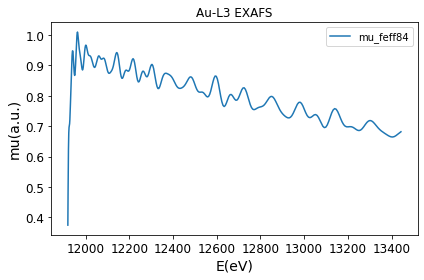

In [12]:
plot_2d(omega,mu,'./','$\mu$_feff84')

Saving figure mu0_feff84


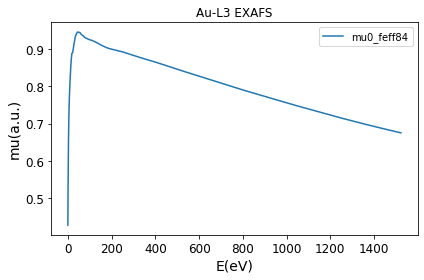

In [13]:
plot_2d(e,mu0,'./','$\mu_0$_feff84')

Saving figure chi_feff84


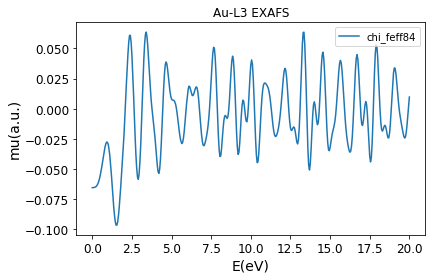

In [14]:
plot_2d(k,chi,'./','chi_feff84')

Saving figure k2chi_feff84


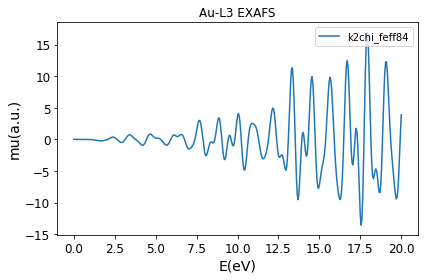

In [15]:
k2 = np.multiply(np.array(k),np.array(k))
chik2 = np.multiply(np.array(chi),np.array(k2))
chik2_list = chik2.tolist()
plot_2d(k,chik2_list,'./','k2chi_feff84')

Saving figure kchi_feff84


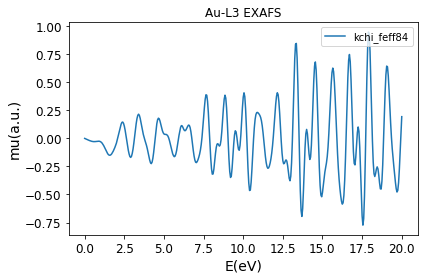

In [16]:
chik = np.multiply(np.array(chi),np.array(k))
chik_list = chik.tolist()
plot_2d(k,chik_list,'./','kchi_feff84')

In [62]:
path_expWT = './expWT.dat'
k_wt,r,wt_re,wt_im,wt_mag,wt_max_min = read_expWT_np(path_expWT)

In [63]:
wt_max_min

[107.9168, -108.6166, 108.2443, -108.5068, 108.6892, 0.0]

In [64]:
plot_3D(k_wt,r,wt_mag,'./','wt_3d')

Saving figure wt_3d


In [65]:
plot_cntf(k_wt,r,wt_mag,'./','wt_cntf_R0=-10')

Saving figure wt_cntf_R0=-10


Saving figure wt_re_cntf_R0=-10


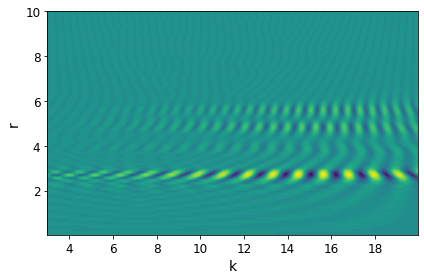

In [95]:
plot_cntf(k_wt,r,wt_re,'./','wt_re_cntf_R0=-10')

Saving figure wt_im_cntf_R0=-10


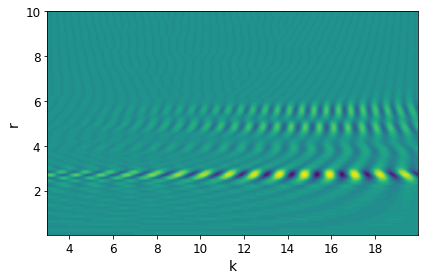

In [96]:
plot_cntf(k_wt,r,wt_im,'./','wt_im_cntf_R0=-10')

In [98]:
path_expFT = './evax_R0=8.25(default)/expFT.dat'
r, expFT_re, expFT_im, expFT_mag = read_expFT(path_expFT)

Saving figure expFT_mag


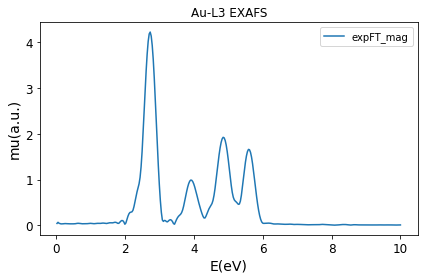

In [99]:
plot_2d(r,expFT_mag,'./','expFT_mag')

In [105]:
path_expBFT = './evax_R0=8.25(default)/expBFT.dat'
k, expBFT = read_expBFT(path_expBFT)

Saving figure expBFT


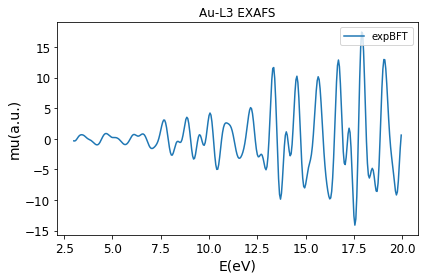

In [106]:
plot_2d(k,expBFT,'./','expBFT')

Saving figure feff84_all


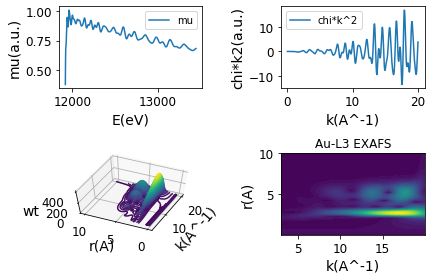

In [35]:
plot_all(omega,mu,k,chik2_list,k_wt,r,wt_mag,'./','feff84_all')

Saving figure feff85L_all


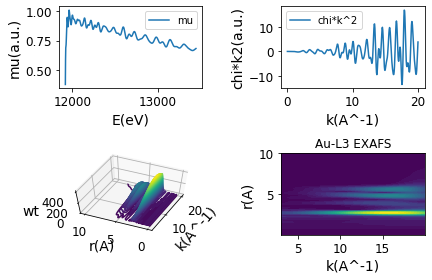

In [83]:
plot_all(omega,mu,k,chik2_list,k_wt,r,wt_mag,'./','feff85L_all')